# Pytorch语法

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt

## TENSOR

### torch.tensor.type()
**查看张量类型：**tensor.dtype

**张量类型转换：**tensor.type()

In [2]:
tensor = torch.rand((2,4))
print(tensor)
print(tensor.dtype)

tensor([[0.8731, 0.0413, 0.3893, 0.2937],
        [0.6656, 0.4881, 0.0244, 0.1615]])
torch.float32


In [3]:
tensor = tensor.type(torch.float64)
print(tensor)
print(tensor.dtype)

tensor([[0.8731, 0.0413, 0.3893, 0.2937],
        [0.6656, 0.4881, 0.0244, 0.1615]], dtype=torch.float64)
torch.float64


### torch.from_numpy()
将numpy格式数据转换成torch.tensor
>torch.numpy() ：将tensor转换成numpy数据

In [5]:
import numpy as np
# numpy的array与torch的tensor的转换
np_data = np.arange(6).reshape((2, 3))
np_data

array([[0, 1, 2],
       [3, 4, 5]])

In [16]:
torch_data = torch.from_numpy(np_data)
print(torch_data.shape)
print(torch_data.size())
torch_data

torch.Size([2, 3])
torch.Size([2, 3])


tensor([[0, 1, 2],
        [3, 4, 5]])

In [11]:
tensor2array = torch_data.numpy() 
print(type(tensor2array))
print(tensor2array.size)
print(tensor2array.shape)
tensor2array

<class 'numpy.ndarray'>
6
(2, 3)


array([[0, 1, 2],
       [3, 4, 5]])

### torch.permute()
改变张量轴的顺序

In [17]:
x = torch.randn(2, 3, 5)
print(type(x))
print(x.size())
print(x.permute(2, 0, 1).size())

<class 'torch.Tensor'>
torch.Size([2, 3, 5])
torch.Size([5, 2, 3])


### torch.reshape()
调整张量形状

In [11]:
x = torch.randn(2, 3, 5)
x.reshape(3,2,5)

tensor([[[-1.5623,  1.5738, -0.0117, -0.4112,  0.6413],
         [ 0.7338, -0.8092, -0.7477, -0.0963,  0.7245]],

        [[-0.2340, -1.5358,  0.4822,  0.7625,  0.6357],
         [ 0.4128, -0.5038, -0.4117, -0.8000,  0.0706]],

        [[-0.8159,  0.6847,  0.1068, -1.2137,  0.3526],
         [-0.9043,  0.3554,  0.6052, -0.8652,  1.0381]]])

In [20]:
x.size()

torch.Size([30])

In [21]:
x = x.reshape(-1)  # 将x拉成一列
x.size()

torch.Size([30])

### [torch.arange()](https://pytorch.org/docs/stable/generated/torch.arange.html)
生成张量序列

In [22]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [23]:
torch.arange(0, 5 * 2, 2, dtype=torch.float32)

tensor([0., 2., 4., 6., 8.])

### [torch.stack()](https://blog.csdn.net/xinjieyuan/article/details/105205326)
>torch.stack(tensors, dim=0, out=None) → Tensor

Concatenates sequence of tensors along a new dimension.  All tensors need to be of the same size.

In [25]:
# 假设是时间步T1
T1 = torch.tensor([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])
# 假设是时间步T2
T2 = torch.tensor([[10, 20, 30],
                [40, 50, 60],
                [70, 80, 90]])

In [26]:
torch.stack((T1,T2),dim=0)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 20, 30],
         [40, 50, 60],
         [70, 80, 90]]])

In [27]:
print(torch.stack((T1,T2),dim=0).shape)

torch.Size([2, 3, 3])


In [28]:
torch.stack((T1,T2),dim=-1)

tensor([[[ 1, 10],
         [ 2, 20],
         [ 3, 30]],

        [[ 4, 40],
         [ 5, 50],
         [ 6, 60]],

        [[ 7, 70],
         [ 8, 80],
         [ 9, 90]]])

In [29]:
print(torch.stack((T1,T2),dim=-1).shape)

torch.Size([3, 3, 2])


### [torch.cat()](https://pytorch.org/docs/stable/generated/torch.cat.html)
>torch.cat(tensors, dim=0, out=None) → Tensor

Concatenates the given sequence of seq tensors in the given dimension. All tensors must either have the same shape (except in the concatenating dimension) or be empty.

In [30]:
torch.cat((T1,T2),dim=1)

tensor([[ 1,  2,  3, 10, 20, 30],
        [ 4,  5,  6, 40, 50, 60],
        [ 7,  8,  9, 70, 80, 90]])

In [31]:
torch.cat((T1,T2),dim=0)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 20, 30],
        [40, 50, 60],
        [70, 80, 90]])

### torch.meshgrid()
生成网格，可以用于生成坐标。

In [32]:
a = torch.tensor([1, 2, 3, 4])
print(a)
b = torch.tensor([4, 5, 6])
print(b)

tensor([1, 2, 3, 4])
tensor([4, 5, 6])


In [39]:
x, y = torch.meshgrid(a, b) # 相当于排列组合，生成坐标点
print(x)
print(y)

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4]])
tensor([[4, 5, 6],
        [4, 5, 6],
        [4, 5, 6],
        [4, 5, 6]])


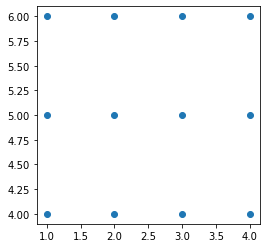

In [40]:
plt.figure(figsize=(4,4))
plt.scatter(x, y)

In [35]:
def coords_fmap2orig(feature, stride=16):  # 特征图上的grid对应于原图的位置
    h, w = feature.shape[1:3]  
    # h, w = 8, 8 # 为演示方便，我们使用尺寸为（4，4）的特征图
    shifts_x = torch.arange(0, w * stride, stride, dtype=torch.float32)
    shifts_y = torch.arange(0, h * stride, stride, dtype=torch.float32)
    shift_y, shift_x = torch.meshgrid(shifts_y, shifts_x)
    shift_x = torch.reshape(shift_x, [-1])
    shift_y = torch.reshape(shift_y, [-1])
    coords = torch.stack([shift_x, shift_y], -1) + (stride // 2)  # 中心点偏置
    # 可视化一下，看看
    plt.figure(figsize=(6,6))
    plt.scatter(coords[:,0], coords[:,1])
    # plt.savefig('grid.png')
    return coords

tensor([[ 8.,  8.],
        [24.,  8.],
        [40.,  8.],
        [56.,  8.],
        [ 8., 24.],
        [24., 24.],
        [40., 24.],
        [56., 24.],
        [ 8., 40.],
        [24., 40.],
        [40., 40.],
        [56., 40.],
        [ 8., 56.],
        [24., 56.],
        [40., 56.],
        [56., 56.]])

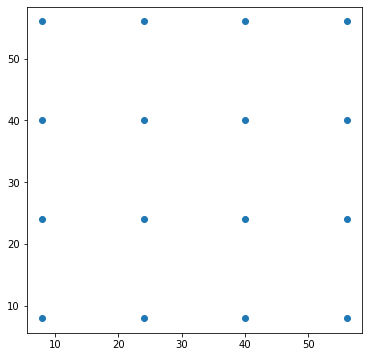

In [36]:
feature = torch.rand((2,4,4))
coords = coords_fmap2orig(feature)
coords

### [None] for Dimension
用于增加张量维度

In [37]:
x = torch.arange(10,dtype=torch.int32)
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.int32)

In [38]:
print(x[None, :, None].shape)
x[None, :, None]  # None 用于增加维度 相当于把数据都放到行维度上 

torch.Size([1, 10, 1])


tensor([[[0],
         [1],
         [2],
         [3],
         [4],
         [5],
         [6],
         [7],
         [8],
         [9]]], dtype=torch.int32)

In [44]:
y = torch.from_numpy(
    np.array([[[10, 12, 48, 60],
               [20, 20, 40, 50]]])
    )

print(y[..., 0].shape)
print(y.dtype)
y[..., 0]  # 取第一列  所有gt框的xmin

torch.Size([1, 2])
torch.int64


tensor([[10, 20]])

In [45]:
print(y[..., 0][:, None, :].shape)
y[..., 0][:, None, :]  #  增加维度

torch.Size([1, 1, 2])


tensor([[[10, 20]]])

In [46]:
# [1,10,1]-[1,1,2]-->[1, 10, 2]
off = x[None, :, None] - y[..., 0][:, None, :]   # None 增加维度用的
off

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 3

### [torch.sum（）](https://blog.csdn.net/weixin_45281949/article/details/103282148?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.channel_param)

张量求和函数

In [47]:
a = torch.tensor([[[1,2,3,1,2],
                   [4,5,6,3,4]],
                  
                  [[7,8,9,2,3],
                   [1,1,2,1,2]],
                  
                  [[7,8,9,2,3],
                   [1,1,2,1,2]]])
print(a.size())

torch.Size([3, 2, 5])


<img src="imgs/3-axis_front.png" width="300" height="400" align="bottom">

In [48]:
b = torch.sum(a,dim=0)
print(b, b.size())

tensor([[15, 18, 21,  5,  8],
        [ 6,  7, 10,  5,  8]]) torch.Size([2, 5])


In [49]:
c = torch.sum(a,dim=1)
print(c,c.size())

tensor([[ 5,  7,  9,  4,  6],
        [ 8,  9, 11,  3,  5],
        [ 8,  9, 11,  3,  5]]) torch.Size([3, 5])


In [51]:
b = torch.sum(a,dim=2)
print(b,b.size())

tensor([[ 9, 22],
        [29,  7],
        [29,  7]]) torch.Size([3, 2])


In [52]:
b = torch.sum(a,dim=(1,2))
print(b,b.size())

tensor([31, 36, 36]) torch.Size([3])


In [53]:
b = torch.sum(a,dim=(2,1))
print(b,b.size())

tensor([31, 36, 36]) torch.Size([3])


### [torch.clamp()](https://blog.csdn.net/u013230189/article/details/82627375)
截断函数，超出范围的值用指定值代替

In [54]:
a=torch.randint(low=0,high=10,size=(10,1))
print(a)
a=torch.clamp(a,3,6)
print(a)

tensor([[1],
        [9],
        [4],
        [7],
        [6],
        [7],
        [1],
        [0],
        [5],
        [4]])
tensor([[3],
        [6],
        [4],
        [6],
        [6],
        [6],
        [3],
        [3],
        [5],
        [4]])


### torch.min()/max()
按维度选取张量中的最值，返回值和索引

In [55]:
x = torch.arange(24).reshape(2,3,4)
x

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [56]:
x.min(dim=-1)

torch.return_types.min(
values=tensor([[ 0,  4,  8],
        [12, 16, 20]]),
indices=tensor([[0, 0, 0],
        [0, 0, 0]]))

In [57]:
torch.min(x, dim=-1)  # dim=-1 在行上看各列的大小

torch.return_types.min(
values=tensor([[ 0,  4,  8],
        [12, 16, 20]]),
indices=tensor([[0, 0, 0],
        [0, 0, 0]]))

In [58]:
y = torch.rand((3,4))
y

tensor([[0.7771, 0.9971, 0.2777, 0.7096],
        [0.9758, 0.4358, 0.1960, 0.0868],
        [0.7660, 0.9169, 0.9004, 0.0221]])

In [59]:
torch.max(y, dim=-1)

torch.return_types.max(
values=tensor([0.9971, 0.9758, 0.9169]),
indices=tensor([1, 0, 1]))

In [60]:
y > 0.5

tensor([[ True,  True, False,  True],
        [ True, False, False, False],
        [ True,  True,  True, False]])

### torch.scatter_()
>output = torch.Tensor.scatter_(dim, index, src)

[.scatter_()](https://blog.csdn.net/weixin_45798469/article/details/108311046)本身的用法有些繁琐，但是这里可以用来生成[独热编码](https://blog.csdn.net/u010630669/article/details/105425572)


[Reference](https://medium.com/@yang6367/understand-torch-scatter-b0fd6275331c)(有空可以看看)

In [62]:
index = torch.tensor([1,2,1,2,0])  # [1,2,1,2,0] 5个元素对应5行，0，1，2 对应3列
x = torch.zeros(5,3).scatter_(-1, index.unsqueeze(1), 1) 
x = x.type(torch.uint8)
x

tensor([[0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0]], dtype=torch.uint8)

In [61]:
y = torch.arange(15).reshape(5,3,1)
y

tensor([[[ 0],
         [ 1],
         [ 2]],

        [[ 3],
         [ 4],
         [ 5]],

        [[ 6],
         [ 7],
         [ 8]],

        [[ 9],
         [10],
         [11]],

        [[12],
         [13],
         [14]]])

In [63]:
y[x]

/home/elimen/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  """Entry point for launching an IPython kernel.


tensor([[ 1],
        [ 5],
        [ 7],
        [11],
        [12]])

### torch.broadcast_tensors
>torch.broadcast_tensors(*tensors) → List of Tensors

Broadcasts the given tensors according to Broadcasting semantics.

In [69]:
x = torch.arange(3).view(1, 3)
y = torch.arange(2).view(2, 1)
print(x)
print(y)

tensor([[0, 1, 2]])
tensor([[0],
        [1]])


In [70]:
m = torch.tensor([[4,8,9]])
n = torch.tensor([[2],[0]])

In [71]:
a, b = torch.broadcast_tensors(m, n)  ## 按照广播机制，返回两个形状相同的tensor

print(a.shape,'\n',a)
print(b.shape,'\n',b)

torch.Size([2, 3]) 
 tensor([[4, 8, 9],
        [4, 8, 9]])
torch.Size([2, 3]) 
 tensor([[2, 2, 2],
        [0, 0, 0]])


## MODEL

### [nn.parameter](https://www.jianshu.com/p/d8b77cc02410)
可以把这个函数理解为类型转换函数，将一个不可训练的数据类型Tensor转换成可以训练的数据类型parameter，并将这个parameter绑定到这个module里面

(net.parameter()中就有这个绑定的parameter，所以在参数优化的时候可以进行优化).

In [72]:
class ScaleExp(nn.Module):
    def __init__(self, init_value=1.0):
        super(ScaleExp, self).__init__()
        self.scale = nn.Parameter(torch.tensor([init_value], dtype=torch.float32))

    def forward(self, x):
        return torch.exp(x * self.scale)  # 乘一个 可以训练的 缩放因子 scale

In [73]:
scale_model = ScaleExp(2)
scale_model.__dict__

{'training': True, '_parameters': OrderedDict([('scale', Parameter containing:
               tensor([2.], requires_grad=True))]), '_buffers': OrderedDict(), '_non_persistent_buffers_set': set(), '_backward_hooks': OrderedDict(), '_forward_hooks': OrderedDict(), '_forward_pre_hooks': OrderedDict(), '_state_dict_hooks': OrderedDict(), '_load_state_dict_pre_hooks': OrderedDict(), '_modules': OrderedDict()}

In [74]:
scale_model._parameters

OrderedDict([('scale', Parameter containing:
              tensor([2.], requires_grad=True))])

In [75]:
x = torch.ones((2,3))
x

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [76]:
y = scale_model(x)
y

tensor([[7.3891, 7.3891, 7.3891],
        [7.3891, 7.3891, 7.3891]], grad_fn=<ExpBackward>)

In [77]:
math.exp(2)  # e**2

7.38905609893065

### [nn.ModuleList()](https://zhuanlan.zhihu.com/p/64990232)
它是一个储存不同 module，并自动将每个 module 的 parameters 添加到网络之中的容器。但，我们需要注意的是，nn.ModuleList 并没有定义一个网络，它只是将不同的模块储存在一起，这些模块在网络之中的先后顺序`由forward函数定义`，与它们在ModuleList中的顺序没有关系

In [78]:
self_scale_exp = nn.ModuleList([ScaleExp(1.0) for _ in range(5)])
self_scale_exp

ModuleList(
  (0): ScaleExp()
  (1): ScaleExp()
  (2): ScaleExp()
  (3): ScaleExp()
  (4): ScaleExp()
)

### [nn.GroupNorm()](https://pytorch.org/docs/stable/generated/torch.nn.GroupNorm.html)
>torch.nn.GroupNorm(num_groups: int, num_channels: int, eps: float = 1e-05, affine: bool = True)



In [81]:
input = torch.randn(2, 6, 10, 10)
# Separate 6 channels into 3 groups
GN = nn.GroupNorm(3, 6) ## 类GroupNorm的实例GN
# Separate 6 channels into 6 groups (equivalent with InstanceNorm)
# m = nn.GroupNorm(6, 6)
# Put all 6 channels into a single group (equivalent with LayerNorm)
# m = nn.GroupNorm(1, 6)
# Activating the module
output = GN(input)
output.shape

torch.Size([2, 6, 10, 10])

* **Normalization总结（BN/LN/IN/GN/SN）**

https://blog.csdn.net/liuxiao214/article/details/81037416?utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromMachineLearnPai2%7Edefault-3.control&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromMachineLearnPai2%7Edefault-3.control

In [109]:
x = np.arange(180).reshape(2,10,3,3)
print(x)
x_bn_mean = np.mean(x, axis=(0, 2, 3), keepdims=True)
x_bn_mean

[[[[  0   1   2]
   [  3   4   5]
   [  6   7   8]]

  [[  9  10  11]
   [ 12  13  14]
   [ 15  16  17]]

  [[ 18  19  20]
   [ 21  22  23]
   [ 24  25  26]]

  [[ 27  28  29]
   [ 30  31  32]
   [ 33  34  35]]

  [[ 36  37  38]
   [ 39  40  41]
   [ 42  43  44]]

  [[ 45  46  47]
   [ 48  49  50]
   [ 51  52  53]]

  [[ 54  55  56]
   [ 57  58  59]
   [ 60  61  62]]

  [[ 63  64  65]
   [ 66  67  68]
   [ 69  70  71]]

  [[ 72  73  74]
   [ 75  76  77]
   [ 78  79  80]]

  [[ 81  82  83]
   [ 84  85  86]
   [ 87  88  89]]]


 [[[ 90  91  92]
   [ 93  94  95]
   [ 96  97  98]]

  [[ 99 100 101]
   [102 103 104]
   [105 106 107]]

  [[108 109 110]
   [111 112 113]
   [114 115 116]]

  [[117 118 119]
   [120 121 122]
   [123 124 125]]

  [[126 127 128]
   [129 130 131]
   [132 133 134]]

  [[135 136 137]
   [138 139 140]
   [141 142 143]]

  [[144 145 146]
   [147 148 149]
   [150 151 152]]

  [[153 154 155]
   [156 157 158]
   [159 160 161]]

  [[162 163 164]
   [165 166 167]
   [168 16

array([[[[ 49.]],

        [[ 58.]],

        [[ 67.]],

        [[ 76.]],

        [[ 85.]],

        [[ 94.]],

        [[103.]],

        [[112.]],

        [[121.]],

        [[130.]]]])

In [102]:
x_ln_mean = np.mean(x, axis=(1, 2, 3), keepdims=True)
x_ln_mean

array([[[[17.5]]],


       [[[53.5]]]])

In [103]:
x_in_mean = np.mean(x, axis=(2, 3), keepdims=True)
x_in_mean

array([[[[ 4.]],

        [[13.]],

        [[22.]],

        [[31.]]],


       [[[40.]],

        [[49.]],

        [[58.]],

        [[67.]]]])

In [110]:
#x.shape[1]
x_group = np.reshape(x, (x.shape[0], 2, int(x.shape[1]/2), x.shape[2], x.shape[3]))
x_group.shape

(2, 2, 5, 3, 3)

In [113]:
x_gn_mean = np.mean(x_group, axis=(2, 3, 4), keepdims=True)
x_gn_mean.shape

(2, 2, 1, 1, 1)

### [nn.init.constant_()](https://pytorch.org/docs/stable/nn.init.html)
>torch.nn.init.constant_(tensor, val)

Fills the input Tensor with the value \text{val}val .

In [82]:
w = torch.empty(3, 5)
nn.init.constant_(w, 0.3)

tensor([[0.3000, 0.3000, 0.3000, 0.3000, 0.3000],
        [0.3000, 0.3000, 0.3000, 0.3000, 0.3000],
        [0.3000, 0.3000, 0.3000, 0.3000, 0.3000]])

### nn.init.normal_()
>torch.nn.init.normal_(tensor, mean=0.0, std=1.0)

Fills the input Tensor with values drawn from the normal distribution 

In [83]:
w = torch.empty(3, 5)
nn.init.uniform_(w)

tensor([[0.0927, 0.1792, 0.0723, 0.7507, 0.8832],
        [0.0970, 0.4864, 0.3152, 0.7508, 0.7109],
        [0.6013, 0.3569, 0.1946, 0.9714, 0.7116]])

## FUNCTION

### nn.functional.pad()

In [ ]:
torch.nn.functional.pad(input, pad, mode,value ) 
    """
    input：四维或者五维的tensor Variabe
    pad：不同Tensor的填充方式
        1.四维Tensor：传入四元素tuple(pad_l, pad_r, pad_t, pad_b)，
        指的是（左填充，右填充，上填充，下填充），其数值代表填充次数
        2.六维Tensor：传入六元素tuple(pleft, pright, ptop, pbottom, pfront, pback)，
        指的是（左填充，右填充，上填充，下填充，前填充，后填充），其数值代表填充次数
    mode： ’constant‘, ‘reflect’ or ‘replicate’三种模式，指的是常量，反射，复制三种模式
    value：填充的数值，在"contant"模式下默认填充0，mode="reflect" or "replicate"时没有默认value参数

    """

In [84]:
original_values = torch.randn([2,1, 3, 2])
print("original_values: ",original_values,"\n")
print("original_values的shape: ",original_values.shape)

original_values:  tensor([[[[ 0.1111, -0.5535],
          [-0.3344, -0.5306],
          [ 0.2692,  0.3256]]],


        [[[-1.4591, -0.0662],
          [-0.8564, -0.4760],
          [-0.8097,  0.8730]]]]) 

original_values的shape:  torch.Size([2, 1, 3, 2])


In [85]:
padding_values = F.pad(original_values, pad=(1,0,0,0), mode="constant", value=0)  
print("padding_values: ",padding_values,"\n")
print("padding_values的shape: ",padding_values.shape)

padding_values:  tensor([[[[ 0.0000,  0.1111, -0.5535],
          [ 0.0000, -0.3344, -0.5306],
          [ 0.0000,  0.2692,  0.3256]]],


        [[[ 0.0000, -1.4591, -0.0662],
          [ 0.0000, -0.8564, -0.4760],
          [ 0.0000, -0.8097,  0.8730]]]]) 

padding_values的shape:  torch.Size([2, 1, 3, 3])


In [86]:
padding_values = F.pad(original_values, pad=(0,0,0,3), mode="constant",value=-1)  
print("padding_values: ",padding_values,"\n")
print("padding_values的shape: ",padding_values.shape)

padding_values:  tensor([[[[ 0.1111, -0.5535],
          [-0.3344, -0.5306],
          [ 0.2692,  0.3256],
          [-1.0000, -1.0000],
          [-1.0000, -1.0000],
          [-1.0000, -1.0000]]],


        [[[-1.4591, -0.0662],
          [-0.8564, -0.4760],
          [-0.8097,  0.8730],
          [-1.0000, -1.0000],
          [-1.0000, -1.0000],
          [-1.0000, -1.0000]]]]) 

padding_values的shape:  torch.Size([2, 1, 6, 2])


### [F.interpolate()](https://pytorch.org/docs/stable/nn.functional.html)
>torch.nn.functional.interpolate(input, size=None, scale_factor=None, mode='nearest', align_corners=None, recompute_scale_factor=None)

Down/up samples the input to either the given size or the given scale_factor

In [87]:
src = torch.rand((1,2,4,5))
src_interp = F.interpolate(src, size=(8, 10),mode='nearest')
src_interp.shape

torch.Size([1, 2, 8, 10])